# Importing libraries

In [1]:
from openpy_ts_clu import clustering_kmeans, scenarios
import matplotlib.pyplot as plt

G:\Mi unidad\GitHub\OpenPy-TS-Clu\openpy_ts_clu\clustering_algorithm.py:16: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Load path of the dataset

In [2]:
path_AMI = r"G:\Mi unidad\UNSJ-IEE\Estudio PhD REID\Avances de Tesis PhD\3. Pseudomedicones para EESD\Data BBDD\London_Low_Carbon\dataset_imputation_30min_260_Users.csv"

# Load scenarios

In [3]:
dict_sce = scenarios.dictionary()
dict_sce['seasons'] = ['Winter']  # ['Summer', 'Fall', 'Winter', 'Spring']
# dict_sce['month'] = ['January']  # ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# dict_sce['year'] = [2013]  # [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
dict_sce['day_name'] = ['Monday']  # ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dict_sce['day_type'] = ['working']  # ['working', 'non-working']

# Create dataset with multiple users

In [4]:
df_multi = scenarios.multiple_users(
        file_path=path_AMI,
        dict_scenario=dict_sce,
        id_col_users='LCLid',
        variable='energy(kWh/hh)'
    )

In [5]:
df_multi.head()

LCLid,MAC000017,MAC000018,MAC000019,MAC000020,MAC000021,MAC000022,MAC000023,MAC000024,MAC000025,MAC000026,...,hour,day,weekday,month,year,seasons,day_name,day_type,date,count_day
index,,,,,,,,,,,,,,,,,,,,,
2012-06-04 00:00:00,0.181,0.181,0.076,0.073,0.388,0.175,0.122,0.149,0.028,0.128,...,0,4,0,June,2012,Winter,Monday,working,2012-06-04,D124
2012-06-04 00:30:00,0.053,0.129,0.084,0.057,0.382,0.183,0.073,0.038,0.005,0.129,...,0,4,0,June,2012,Winter,Monday,working,2012-06-04,D124
2012-06-04 01:00:00,0.075,0.121,0.031,0.056,0.394,0.230,0.053,0.054,0.015,0.147,...,1,4,0,June,2012,Winter,Monday,working,2012-06-04,D124
2012-06-04 01:30:00,0.055,0.123,0.050,0.069,0.385,0.058,0.055,0.191,0.018,0.198,...,1,4,0,June,2012,Winter,Monday,working,2012-06-04,D124
2012-06-04 02:00:00,0.037,0.187,0.096,0.054,0.392,0.042,0.053,0.080,0.005,0.165,...,2,4,0,June,2012,Winter,Monday,working,2012-06-04,D124


In [25]:
df_multi.shape

(1248, 271)

# Clustering using KMeans

## Init class to clustering

In [6]:
model = clustering_kmeans(
    model='KMeans',
    users=None,
    metric='dtw',
    df_sce=df_multi,
    type_dr='mds'
)


## Optimal number of clusters

  0%|          | 0/8 [00:00<?, ?it/s]

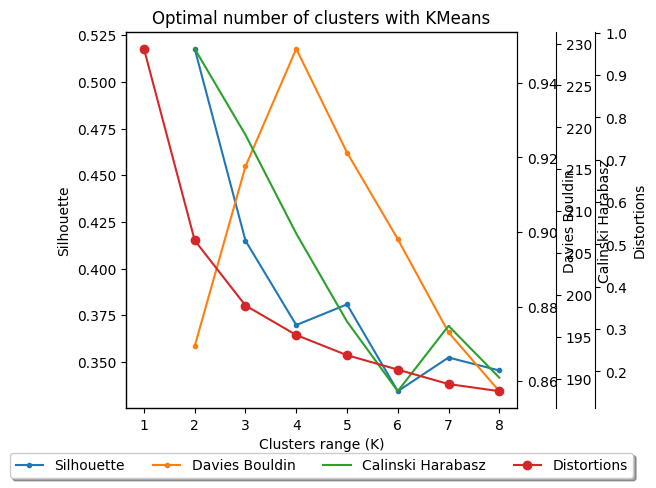

,Silhouette,Davies Bouldin,Calinski Harabasz,Clusters range (K),Distortions
0,NaN,NaN,NaN,1,0.962247
1,0.517697,0.869420,229.377889,2,0.509447
2,0.414938,0.917577,219.108400,3,0.355713
3,0.369737,0.949103,207.332700,4,0.286052
4,0.380807,0.921293,196.839320,5,0.238320
5,0.334329,0.898080,188.527892,6,0.204247
6,0.352340,0.873070,196.322658,7,0.170132
7,0.345408,0.857314,190.141765,8,0.153338


In [7]:
model.optimal_number_of_clusters(max_clusters=8, plt_metrics=True)

## Get dendogram

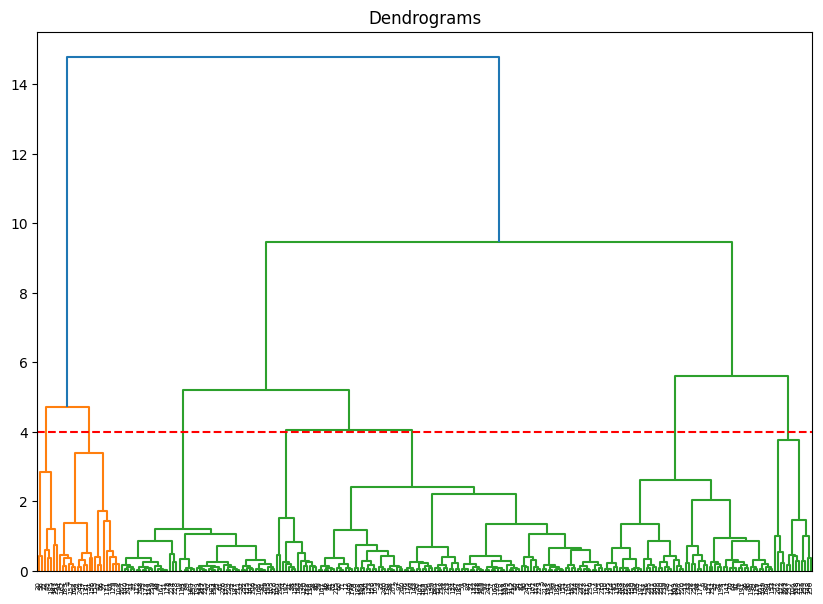

In [8]:
model.get_dendograma(n_cluster=4)

## Train clustering model

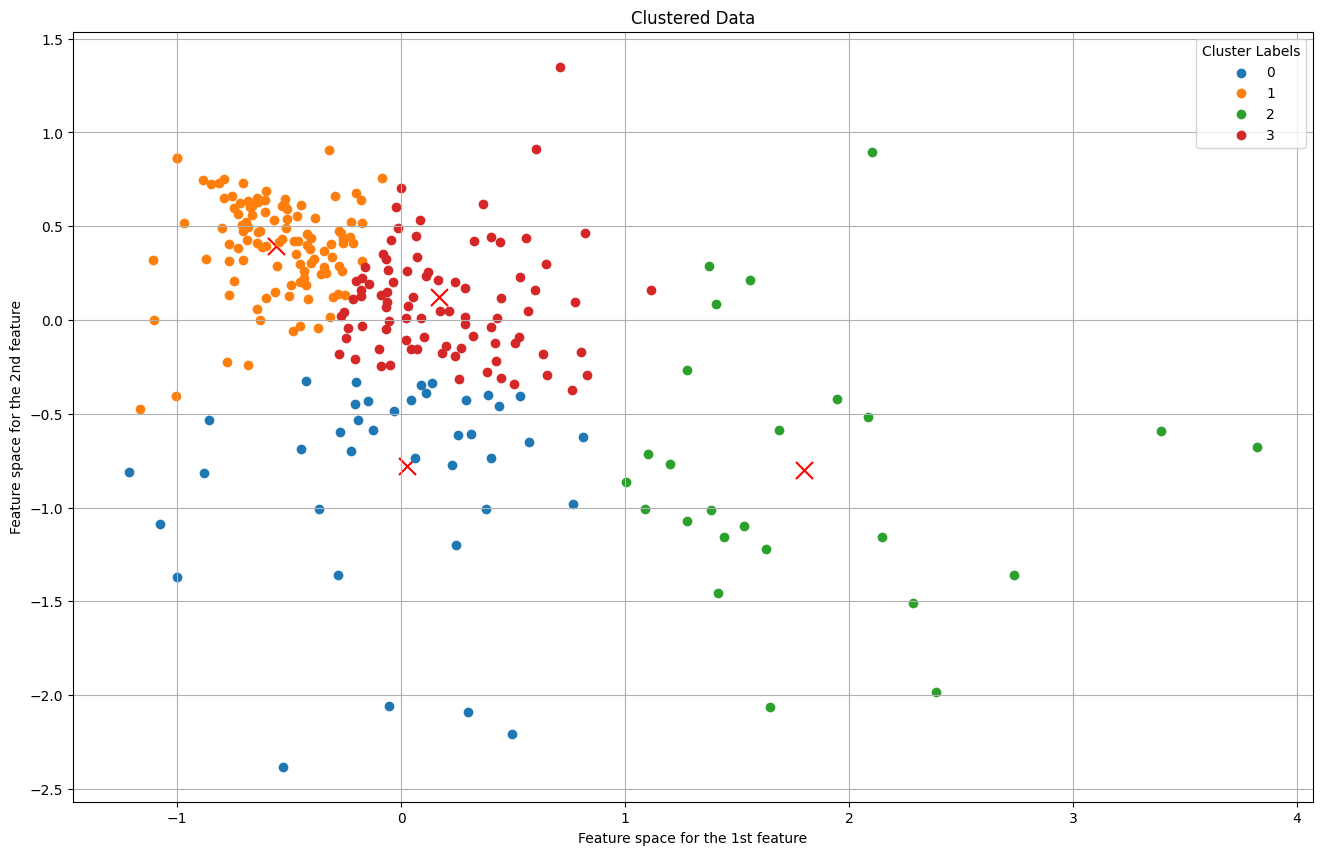

In [10]:
dict_clu = model.train_clu_model(n_clusters=4, acum_bar=True, points_2d=True)

In [11]:
dict_clu.keys()

dict_keys(['clu_model', 'ts_clustered', 'cluster_labels', 'data', 'ts_scaler', 'dict_scaler', 'dataset', 'clusters', 'data_user'])

In [12]:
dict_clu['dataset']

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,cluster,user
MAC000017,0.063091,0.054317,0.054962,0.051192,0.050135,0.055115,0.06051,0.050231,0.045,0.050231,...,0.145793,0.165962,0.171846,0.189058,0.173971,0.130923,0.084712,0.062846,1,MAC000017
MAC000018,0.206264,0.203702,0.19376,0.200048,0.184149,0.159659,0.14201,0.153409,0.14651,0.150154,...,0.174043,0.225966,0.323635,0.336269,0.32788,0.315394,0.290269,0.292615,3,MAC000018
MAC000019,0.071692,0.073346,0.076692,0.077615,0.069769,0.077885,0.076462,0.065077,0.075538,0.075846,...,0.126769,0.111808,0.122154,0.123577,0.108077,0.107154,0.088769,0.079385,1,MAC000019
MAC000020,0.062769,0.063885,0.060385,0.059962,0.061231,0.062534,0.059615,0.060692,0.060764,0.064442,...,0.157678,0.162231,0.165808,0.163154,0.130308,0.086851,0.067014,0.063543,1,MAC000020
MAC000021,0.324841,0.320731,0.312192,0.311812,0.331389,0.307577,0.318577,0.325231,0.318692,0.326154,...,0.497947,0.515077,0.502577,0.511,0.521154,0.456803,0.409563,0.348034,2,MAC000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC005307,0.056269,1.010808,0.597923,0.032788,0.036452,0.045038,0.351495,0.179856,0.175769,0.038654,...,0.054692,0.070192,0.081322,0.100841,0.094154,0.083615,0.075038,0.048553,0,MAC005307
MAC005309,1.307572,0.717077,0.239038,0.147173,0.12626,0.119952,0.110135,0.122476,0.114942,0.125192,...,0.232438,0.266308,0.233442,0.209154,0.136168,0.092231,0.069067,0.105135,0,MAC005309
MAC005311,0.02024,0.025385,0.024885,0.022615,0.020962,0.026423,0.022885,0.025192,0.018702,0.022769,...,0.050418,0.043712,0.04051,0.044365,0.025077,0.023846,0.014308,0.02013,1,MAC005311
MAC005409,0.129673,0.131385,0.128769,0.126856,0.126308,0.127385,0.124269,0.127115,0.123885,0.125115,...,0.185327,0.23325,0.207885,0.187207,0.153202,0.132639,0.129942,0.130154,3,MAC005409


## Extract time series of clusters

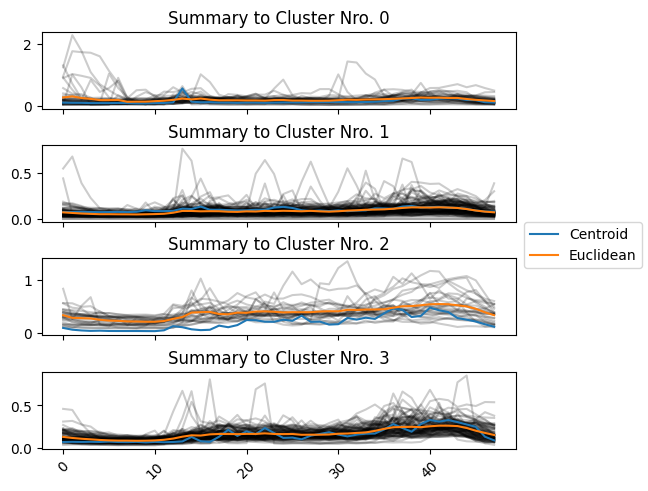

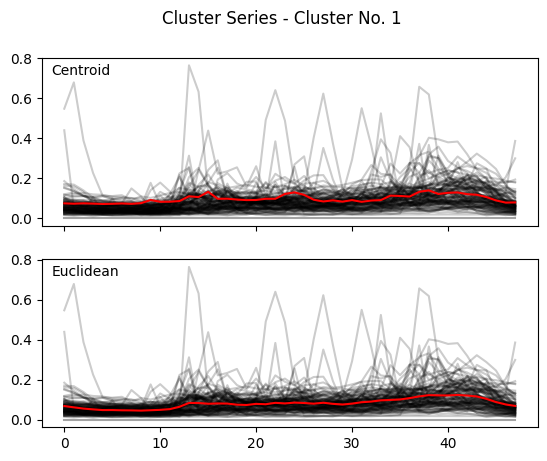

G:\Mi unidad\GitHub\OpenPy-TS-Clu\openpy_ts_clu\clustering_algorithm.py:665: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


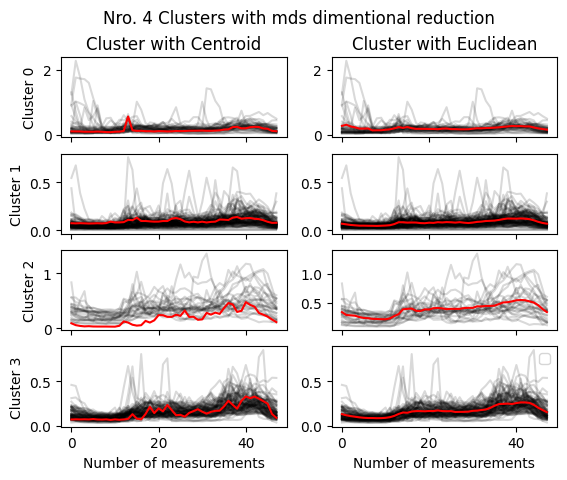

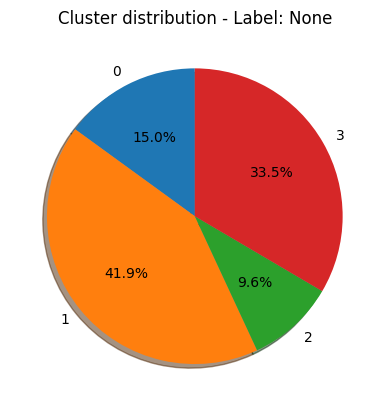

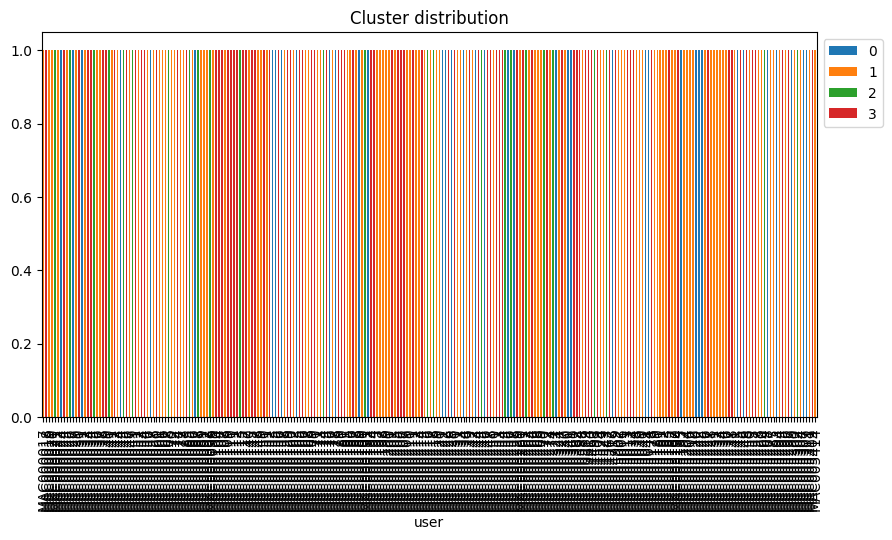

In [13]:
dict_clu = model.cluster_ts_extraction(n_clusters=4, all_barycenters=True, plt_all_graphs=True)

In [14]:
dict_clu.keys()

dict_keys(['dataset', 'clusters', 'centroid', 'euclidean'])

In [19]:
dict_clu['centroid']

[array([[0.10785096],
        [0.10379808],
        [0.10303846],
        [0.09438462],
        [0.09496154],
        [0.09438462],
        [0.09976923],
        [0.09411538],
        [0.08406731],
        [0.08265385],
        [0.0945    ],
        [0.09887019],
        [0.11912019],
        [0.56496154],
        [0.13975   ],
        [0.12031731],
        [0.12482212],
        [0.11167308],
        [0.1125    ],
        [0.10444231],
        [0.11426923],
        [0.1119375 ],
        [0.10481731],
        [0.10896154],
        [0.11775481],
        [0.11528365],
        [0.1170625 ],
        [0.12554327],
        [0.12610577],
        [0.12750962],
        [0.13117788],
        [0.125     ],
        [0.12470673],
        [0.12981731],
        [0.13788942],
        [0.16143269],
        [0.16886538],
        [0.23785577],
        [0.24632212],
        [0.19953846],
        [0.20224038],
        [0.23485577],
        [0.24646154],
        [0.24091346],
        [0.19596154],
        [0

In [16]:
len(dict_clu['dataset'])

6760

In [17]:
len(dict_clu['euclidean'])

4

## Plot time series of clusters and barycenters

### Centroids

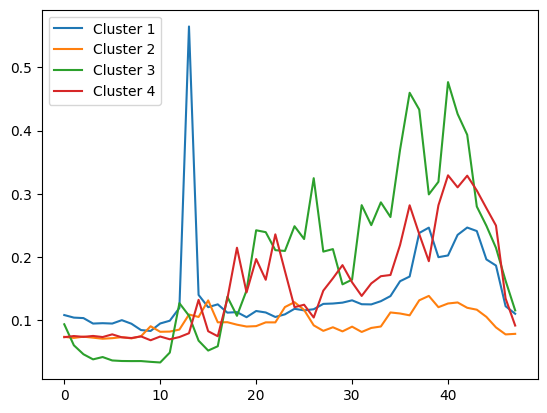

In [18]:
for i in range(len(dict_clu['centroid'])):
    plt.plot(dict_clu['centroid'][i], label='Cluster ' + str(i + 1))
plt.legend()

In [23]:
dict_clu['centroid'][0].T

array([[0.10785096, 0.10379808, 0.10303846, 0.09438462, 0.09496154,
        0.09438462, 0.09976923, 0.09411538, 0.08406731, 0.08265385,
        0.0945    , 0.09887019, 0.11912019, 0.56496154, 0.13975   ,
        0.12031731, 0.12482212, 0.11167308, 0.1125    , 0.10444231,
        0.11426923, 0.1119375 , 0.10481731, 0.10896154, 0.11775481,
        0.11528365, 0.1170625 , 0.12554327, 0.12610577, 0.12750962,
        0.13117788, 0.125     , 0.12470673, 0.12981731, 0.13788942,
        0.16143269, 0.16886538, 0.23785577, 0.24632212, 0.19953846,
        0.20224038, 0.23485577, 0.24646154, 0.24091346, 0.19596154,
        0.18628846, 0.12183173, 0.10988942]])

### Euclidean

In [ ]:
for i in range(len(dict_clu['euclidean'])):
    plt.plot(dict_clu['euclidean'][i], label='Cluster ' + str(i + 1))
plt.legend()

In [24]:
dict_clu['euclidean'][0].T

array([[0.27589226, 0.31028945, 0.25838573, 0.22875407, 0.19109961,
        0.1913411 , 0.19546425, 0.13689152, 0.14035022, 0.14070118,
        0.15610762, 0.17113782, 0.19766272, 0.23915237, 0.21294835,
        0.24080436, 0.20484406, 0.18444921, 0.18518725, 0.18419379,
        0.1802717 , 0.17982927, 0.17432039, 0.1906303 , 0.19399408,
        0.17603501, 0.1763321 , 0.16965545, 0.17019107, 0.17301886,
        0.18819071, 0.20285811, 0.19877786, 0.20862882, 0.21262426,
        0.22095328, 0.23117369, 0.24602281, 0.2576393 , 0.27256447,
        0.26704413, 0.26892554, 0.25893849, 0.26025826, 0.22586785,
        0.19914768, 0.18007717, 0.15979943]])